In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
bfdata = pd.read_csv("BlackFridaySales.csv")

bfdata

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Crime_rate,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase2
0,1000001,P00069042,F,0-17,10,A,8,2,0,3,NaN,NaN,8370,0
1,1000001,P00248942,F,0-17,10,A,6,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,0-17,10,A,17,2,0,12,NaN,NaN,1422,0
3,1000001,P00085442,F,0-17,10,A,17,2,0,12,14.0,NaN,1057,0
4,1000002,P00285442,M,55+,16,C,13,4,0,8,NaN,NaN,7969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1000175,P00085542,F,26-35,2,B,10,1,0,5,14.0,NaN,6919,0
1040,1000175,P00307642,F,26-35,2,B,10,1,0,5,6.0,NaN,1772,0
1041,1000175,P00052842,F,26-35,2,B,15,1,0,10,15.0,NaN,23341,1
1042,1000175,P00057542,F,26-35,2,B,8,1,0,3,4.0,5.0,10604,1


In [62]:
bfdata.shape
bfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1044 non-null   int64  
 1   Product_ID                  1044 non-null   object 
 2   Gender                      1044 non-null   object 
 3   Age                         1044 non-null   object 
 4   Occupation                  1044 non-null   int64  
 5   City_Category               1044 non-null   object 
 6   Crime_rate                  1044 non-null   int64  
 7   Stay_In_Current_City_Years  1044 non-null   int64  
 8   Marital_Status              1044 non-null   int64  
 9   Product_Category_1          1044 non-null   int64  
 10  Product_Category_2          731 non-null    float64
 11  Product_Category_3          336 non-null    float64
 12  Purchase                    1044 non-null   int64  
 13  Purchase2                   1044 

In [63]:
bfdata.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Crime_rate                      0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2            313
Product_Category_3            708
Purchase                        0
Purchase2                       0
dtype: int64

Cleaning:

One of the feature is 'Crime_rate' which tells us about the crime rate in that particular city. I see that there is no noticeable relation so discarding that column.

In [64]:
bfdata.drop(columns=['Crime_rate'],inplace=True)
bfdata.columns



Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Purchase2'],
      dtype='object')

Checking null values

In [65]:
bfdata.isnull().sum()

bfdata['Product_ID'] = bfdata['Product_ID'].str.lstrip()

I see Product_Category_2  and Product_Category_3 have significanty high number of NULL values. I will discard these columns for now.

In [66]:
bfdata.drop(columns=['Product_Category_2','Product_Category_3'],inplace=True)
bfdata.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Purchase2'],
      dtype='object')

In [67]:
#Checking if there are more NULL Values
bfdata.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
Purchase2                     0
dtype: int64

1. Clustering

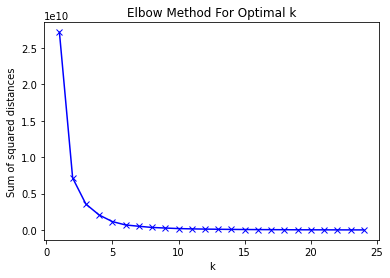

Distortion:  7147556314.76052
Average of square root:  2616.5470202458787
Centroids: 
 [[7.93582090e+00 6.37294627e+03]
 [8.51069519e+00 1.54971791e+04]]
Assignments:  [0 1 0 ... 1 0 0]


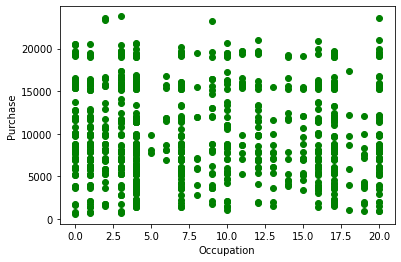

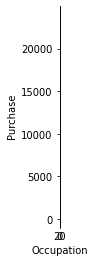

In [68]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math


bfdata['a'] = bfdata['User_ID'].astype(int)
bfdata['b'] = bfdata['Occupation'].astype(int)
bfdata['c'] = bfdata['Stay_In_Current_City_Years'].astype(int)
bfdata['d'] = bfdata['Marital_Status'].astype(int)
bfdata['e'] = bfdata['Product_Category_1'].astype(int)
bfdata['f'] = bfdata['Purchase'].astype(int)
bfdata['g'] = bfdata['Purchase2'].astype(int)


X = bfdata[['b','f']]

k_means = KMeans(n_clusters=2)
k_means.fit(X)


sosqud = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sosqud.append(km.inertia_)

plt.plot(K, sosqud, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Distortion: ", k_means.inertia_)
RMS_AVG = math.sqrt(k_means.inertia_ / len(X))

print("Average of square root: ", RMS_AVG)
print("Centroids: \n", k_means.cluster_centers_)
print("Assignments: ", k_means.labels_)


plt.scatter(bfdata['b'],bfdata['f'], color="green")
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.show()


cluster_x = [x for [x,y] in k_means.cluster_centers_]
cluster_y = [y for [x,y] in k_means.cluster_centers_]


plt.scatter(bfdata['b'],bfdata['f'], c=k_means.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.axis("scaled")
plt.show()

2. Dimensional analysis

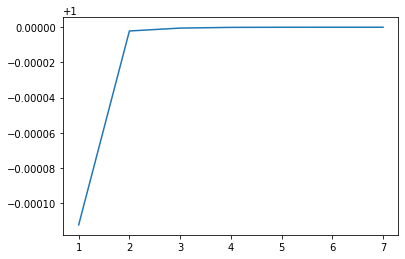

In [72]:
from sklearn.decomposition import PCA
import numpy as np
X_train =  bfdata[['User_ID','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Purchase','Purchase2']]

y_train = bfdata['City_Category']
pca = PCA()
pca.fit(X_train)
sums = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
valt = [i+1 for i in range(0,len(sums))]
plt.plot(valt, sums)
plt.show()

In [75]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

MNIST_model = SVC(random_state = 123, max_iter=1200, tol=0.25)

hit = Pipeline([
    ('svc', MNIST_model)
])

print(hit)
X_train =  bfdata[['User_ID','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Purchase','Purchase2']]
y_train = bfdata['City_Category']

hit.fit(X_train, y_train)

Pipeline(steps=[('svc', SVC(max_iter=1200, random_state=123, tol=0.25))])


Pipeline(steps=[('svc', SVC(max_iter=1200, random_state=123, tol=0.25))])

3. Visualize and create a narrative about what you have discovered in the data. Don't just be descriptive, think predictively.

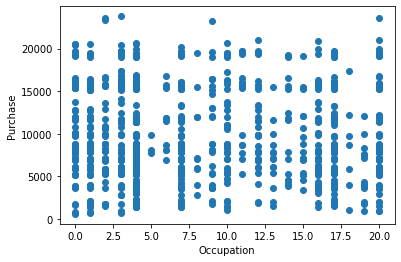

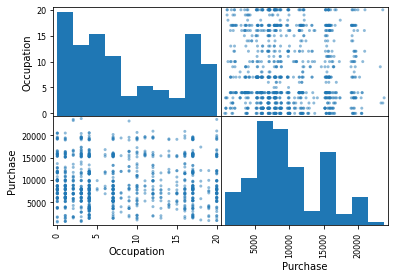

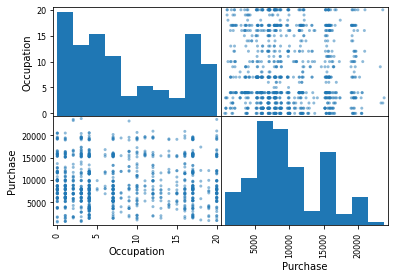

In [81]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.scatter(bfdata['Occupation'],bfdata['Purchase'])
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.show()

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
features = ["Occupation","Stay_In_Current_City_Years"]
scatter_matrix(bfdata[a])
plt.show()

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
features = ["Occupation","Purchase"]
scatter_matrix(bfdata[a])
plt.show()

I noticed that those who have lived in the city for one year likely to spend the most.This is comprehensible since individuals who have lived in the city for more than four years are often more established and less interested in buying new goods than those who are new to the city, who tend to spend more. Similarly occupation has an effect on purchases. When we combined Purchase and Marital_Status for analysis, we came to know that Single Men spend the most during the Black Friday. It also tells that Men tend to spend less once they are married. It maybe because of the added responsibilities.


4. Is there anomalous data? What does it mean?

No, there is no unusual data in my dataset.
Anomalous data is defined as data with strange patterns that diverge considerably from normal behavior. 

5. Explore more advanced regression/classifier tools.  (Random Forrest is interesting, Neural Nets are king.)

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier



X = bfdata[['User_ID','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Purchase2']]
Y = bfdata['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)

scalert = StandardScaler()
scalert.fit(X_test)
transformt = scalert.transform(X_test)
scalar_test = pd.DataFrame(transformt)

clf=RandomForestClassifier(n_estimators=200)
clf.fit(scalar_train,y_train)

clft=RandomForestClassifier(n_estimators=200)
clft.fit(scalar_test,y_test)

y_pred=clf.predict(scalar_train)
clf.fit(scalar_train,y_train)
print("Accuracy for train:",metrics.accuracy_score(y_train, y_pred))

y_predt=clft.predict(scalar_test)
clft.fit(scalar_test,y_test)
print("Accuracy for test:",metrics.accuracy_score(y_test, y_predt))


Accuracy for train: 0.5684931506849316
Accuracy for test: 0.7133757961783439


In [88]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

X = bfdata[['User_ID','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Purchase2']]
Y = bfdata['Purchase']
RClassifier = RandomForestClassifier()
RClassifier.fit(X,Y)

from sklearn.metrics import confusion_matrix
y_predicted = RClassifier.predict(X)
print("Confusion matrix")
matrix = confusion_matrix(Y, y_predicted)
print(matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(Y, y_predicted))

print ("F1 is ", f1_score(Y, y_predicted, average="weighted"))

Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Accuracy is  0.49137931034482757
F1 is  0.3995440414642578


In [79]:
# Neural Nets 

from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()
train.shape

(1044, 1)

In [86]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(solver='adam', alpha=0.0001,
                    hidden_layer_sizes=(20, 20, 20), random_state=1,max_iter=200,learning_rate_init=0.001)
clf_MLP.fit(scalar_train, y_train) 
y_pred=clf_MLP.predict(scalar_test) 
clf_MLP.score(scalar_test,y_test)

c:\Users\S545709\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0

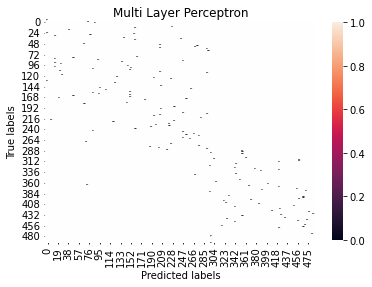

<Figure size 288x288 with 0 Axes>

In [84]:
import seaborn as sns
df_cm = pd.DataFrame(
        confusion_matrix(y_test, y_pred)
)
ax= plt.subplot()
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True, ax = ax,fmt='d'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Multi Layer Perceptron');

In [103]:
clf_MLP1 = MLPClassifier(solver='adam', alpha=0.0001,
                    hidden_layer_sizes=(30, 30, 30), random_state=1,max_iter=200,learning_rate_init=0.001)
clf_MLP1.fit(scalar_train, y_train) 
clf_MLP1.score(scalar_test,y_test)

0.0

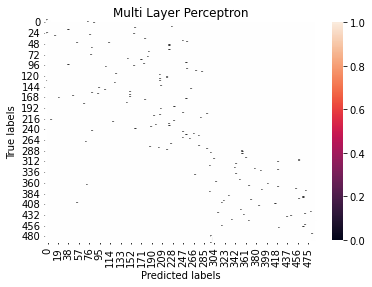

<Figure size 288x288 with 0 Axes>

In [99]:
df_cm = pd.DataFrame(
        confusion_matrix(y_test, y_pred)
)
ax= plt.subplot()
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True, ax = ax,fmt='d'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Multi Layer Perceptron');

In [100]:
parameter_space = {
    'hidden_layer_sizes': [(30,20,10),(20,20,20)],
    'max_iter': [200,500]
}
mlp = MLPClassifier(solver='adam',alpha=0.0001,learning_rate_init=0.001)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, cv=3)
clf.fit(scalar_train, y_train)
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

c:\Users\S545709\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
c:\Users\S545709\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Users\S545709\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Users\S545709\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maxim

Best parameters found:
 {'hidden_layer_sizes': (30, 20, 10), 'max_iter': 200}
0.003 (+/-0.004) for {'hidden_layer_sizes': (30, 20, 10), 'max_iter': 200}
0.001 (+/-0.004) for {'hidden_layer_sizes': (30, 20, 10), 'max_iter': 500}
0.003 (+/-0.004) for {'hidden_layer_sizes': (20, 20, 20), 'max_iter': 200}
0.001 (+/-0.004) for {'hidden_layer_sizes': (20, 20, 20), 'max_iter': 500}


c:\Users\S545709\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [101]:
clf.predict(scalar_test)
print('Results on the test set:')
print(clf.score(scalar_test,y_test))

Results on the test set:
0.0
